In [32]:
import torch
import torch.nn as nn
import torchvision.transforms as tvt
from tqdm import tqdm
import numpy as np

from sklearn import manifold
import matplotlib.pyplot as plt

In [43]:
cifar100_56_embeddings = torch.load("./cifar100_dino_embeddings_train_56.pt")
cifar100_112_embeddings = torch.load("./cifar100_dino_embeddings_train_112.pt")
cifar100_224_embeddings = torch.load("./cifar100_dino_embeddings_train_224.pt")

In [44]:
embeddings_56 = torch.tensor([])
labels_56 = torch.tensor([])
for key, val in cifar100_56_embeddings.items():
    embeddings_56 = torch.concat([embeddings_56, val['embedding']], dim=0)
    labels_56 = torch.concat([labels_56, val['label']])

In [45]:
embeddings_112 = torch.tensor([])
labels_112 = torch.tensor([])
for key, val in cifar100_112_embeddings.items():
    embeddings_112 = torch.concat([embeddings_112, val['embedding']], dim=0)
    labels_112 = torch.concat([labels_112, val['label']])

In [46]:
embeddings_224 = torch.tensor([])
labels_224 = torch.tensor([])
for key, val in cifar100_224_embeddings.items():
    embeddings_224 = torch.concat([embeddings_224, val['embedding']], dim=0)
    labels_224 = torch.concat([labels_224, val['label']])

In [ ]:
transform_label = np.concatenate([np.zeros((embeddings_56.shape[0])), np.zeros((embeddings_56.shape[0])) + 1, np.zeros((embeddings_56.shape[0])) + 2])
embeddings = torch.concat([embeddings_56, embeddings_112, embeddings_224])

In [92]:
tsne = manifold.TSNE(perplexity=50)

In [93]:
embedded = tsne.fit_transform(embeddings)

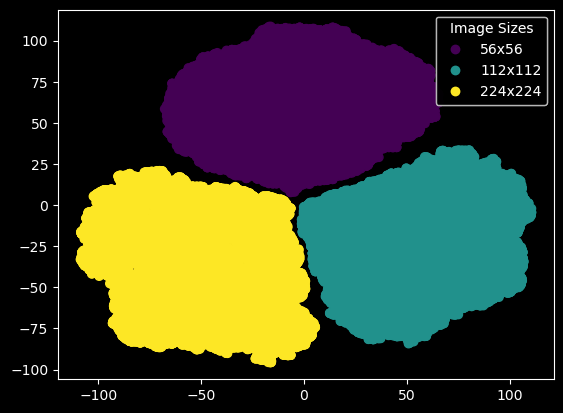

In [94]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=embedded[:, 0], y=embedded[:, 1], c=transform_label)
handles, labels = scatter.legend_elements()
labels = ['56x56', '112x112', '224x224']
legend = ax.legend(handles=handles, labels=labels, loc="best", title="Image Sizes")
ax.add_artist(legend)
plt.show()